In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


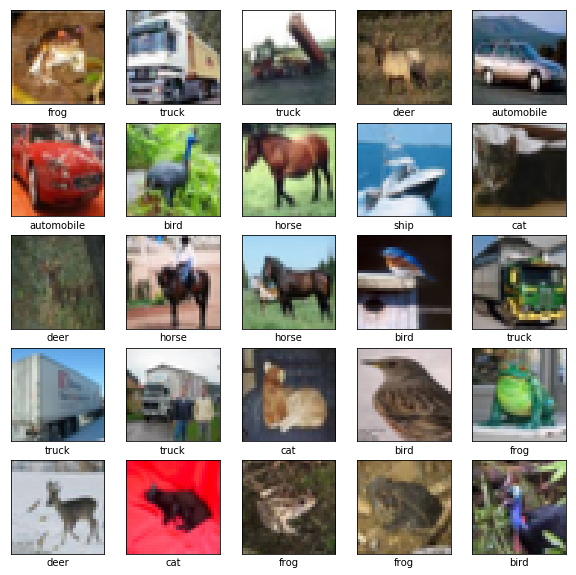

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


#### Buid the Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.7553 - accuracy: 0.3476 - val_loss: 1.2045 - val_accuracy: 0.5651
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1829 - accuracy: 0.5791 - val_loss: 1.0676 - val_accuracy: 0.6293
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0111 - accuracy: 0.6436 - val_loss: 0.9698 - val_accuracy: 0.6572
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8842 - accuracy: 0.6906 - val_loss: 0.9732 - val_accuracy: 0.6556
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8147 - accuracy: 0.7178 - val_loss: 0.8952 - val_accuracy: 0.6907
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7559 - accuracy: 0.7363 - val_loss: 0.8643 - val_accuracy: 0.7035
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7071 - accuracy: 0.7527 - val_loss: 0.8510 -

313/313 - 3s - loss: 0.8811 - accuracy: 0.7075


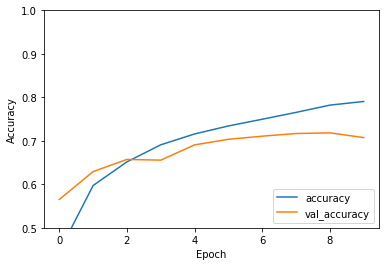

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [12]:
print(test_acc)

0.7074999809265137


In [14]:
y_pred = model.predict(test_images)
y_pred

array([[ 0.18423033, -5.5524    , -0.4075472 , ..., -6.063101  ,
        -0.42307866, -6.387612  ],
       [ 5.179564  ,  3.7808197 ,  0.37402493, ..., -8.03304   ,
         5.872212  ,  1.279024  ],
       [ 2.138825  ,  0.49925822, -2.4487958 , ..., -2.6032445 ,
         4.8319707 , -0.27324313],
       ...,
       [-3.2953537 , -6.3889127 ,  3.3322885 , ...,  1.6806588 ,
        -1.8570979 , -4.487434  ],
       [ 2.0195768 ,  6.1481643 , -2.9411411 , ..., -2.553595  ,
        -2.203059  , -1.2138913 ],
       [-2.7006738 , -5.9369917 ,  3.2003946 , ..., 11.641484  ,
        -8.032241  , -6.782991  ]], dtype=float32)

In [15]:
y_pred_labels = model.predict_classes(test_images)
y_pred_labels

E:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

8


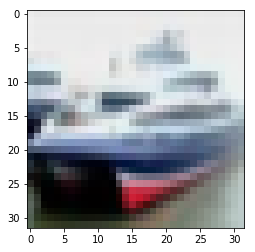

In [19]:
plt.imshow(test_images[1])
print(y_pred_labels[1])

In [20]:
print(test_labels)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
print(confusion_matrix(test_labels,y_pred_labels))

[[797  21  65  37  16   2   1  13  38  10]
 [ 32 864   8  19   3   3   6   1  22  42]
 [ 60   5 643 123  60  45  27  26   9   2]
 [ 18  12  69 700  48  75  37  25  12   4]
 [ 29   4 124 107 608  20  19  82   7   0]
 [  9   4  68 311  28 518   9  46   6   1]
 [  7   5  84 130  31  14 712   7   9   1]
 [ 21   2  44  78  47  33   3 767   1   4]
 [ 96  28  15  31   5   7   3   8 794  13]
 [ 73 120  15  36   8   7   4  27  38 672]]


In [31]:
print(classification_report(test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74      1000
           1       0.81      0.86      0.84      1000
           2       0.57      0.64      0.60      1000
           3       0.45      0.70      0.54      1000
           4       0.71      0.61      0.66      1000
           5       0.72      0.52      0.60      1000
           6       0.87      0.71      0.78      1000
           7       0.77      0.77      0.77      1000
           8       0.85      0.79      0.82      1000
           9       0.90      0.67      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



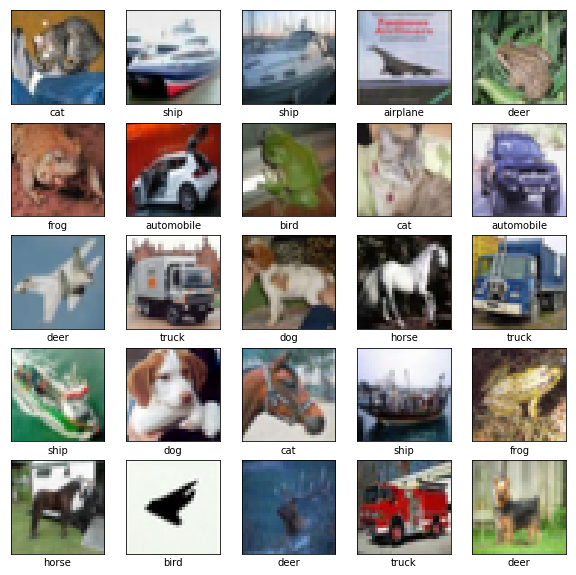

In [41]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_pred_labels[i]])
plt.show()

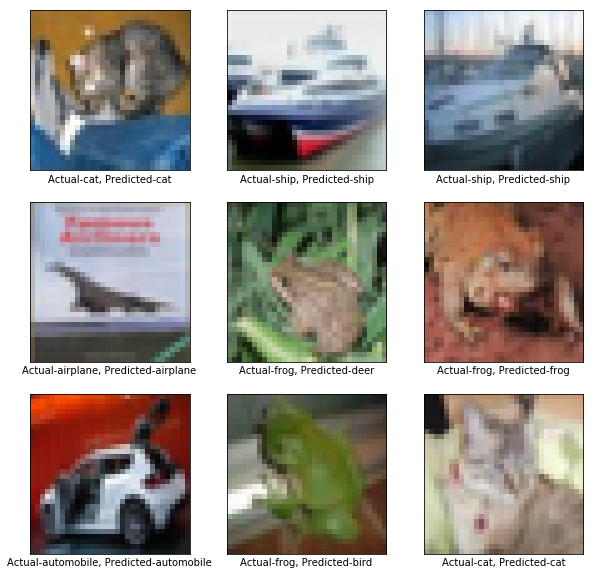

cat


In [47]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(f'Actual-{class_names[test_labels[i][0]]}, Predicted-{class_names[y_pred_labels[i]]}')
plt.show()
print(class_names[test_labels[i][0]])